# **Grafici**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.style.use("ggplot")

In [2]:
nodes_loading_cent = pd.read_csv(
    "./../results/loading_nodes_cent_new.csv", index_col=[0, 1]
)
edges_loading_cent = pd.read_csv(
    "./../results/loading_edges_cent_new.csv", index_col=[0, 1]
)
nodes_loading_dist = pd.read_csv(
    "./../results/loading_nodes_dist_new.csv", index_col=[0, 1]
)
edges_loading_dist = pd.read_csv(
    "./../results/loading_edges_dist_new.csv", index_col=[0, 1]
)


In [3]:
nodes_loading_cent_ack = pd.read_csv(
    "./../results/loading_nodes_cent_new_with_ack.csv", index_col=[0, 1]
)
edges_loading_cent_ack = pd.read_csv(
    "./../results/loading_edges_cent_new_with_ack.csv", index_col=[0, 1]
)
nodes_loading_dist_ack = pd.read_csv(
    "./../results/loading_nodes_dist_new_with_ack.csv", index_col=[0, 1]
)
edges_loading_dist_ack = pd.read_csv(
    "./../results/loading_edges_dist_new_with_ack.csv", index_col=[0, 1]
)

## Nodes

In [4]:

cols = [
    "ex",
    "qty",
    "city",
    "color",
    "country",
    "located_in",
    "movie",
    "movie_category",
    "user",
    "university",
]

nodes_loading_cent.reset_index(inplace=True)
nodes_loading_cent.columns = cols

nodes_loading_dist.reset_index(inplace=True)
nodes_loading_dist.columns = cols

nodes_loading_cent_ack.reset_index(inplace=True)
nodes_loading_cent_ack.columns = cols

nodes_loading_dist_ack.reset_index(inplace=True)
nodes_loading_dist_ack.columns = cols

### Centralized

In [5]:
summary_nodes_cent = (
    nodes_loading_cent.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)
summary_nodes_cent.head()

,qty,mean,std
0,5000,3.289061,0.046995
1,10000,6.405218,0.047076
2,25000,15.704704,0.080557
3,50000,31.199313,0.123353
4,100000,62.293718,0.222520


In [6]:
summary_nodes_cent_ack = (
    nodes_loading_cent_ack.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)
summary_nodes_cent_ack

,qty,mean,std
0,5000,4.083256,0.055018
1,10000,7.939268,0.127238
2,25000,19.349207,0.232263
3,50000,38.897267,0.426280
4,100000,78.748530,0.874560


In [7]:
total_df = pd.concat([summary_nodes_cent, summary_nodes_cent_ack], axis=1)
total_df.columns = ["qty", "mean", "std", "qty_ack", "mean_ack", "std_ack"]
total_df.drop("qty_ack", axis=1, inplace=True)
total_df

,qty,mean,std,mean_ack,std_ack
0,5000,3.289061,0.046995,4.083256,0.055018
1,10000,6.405218,0.047076,7.939268,0.127238
2,25000,15.704704,0.080557,19.349207,0.232263
3,50000,31.199313,0.123353,38.897267,0.426280
4,100000,62.293718,0.222520,78.748530,0.874560


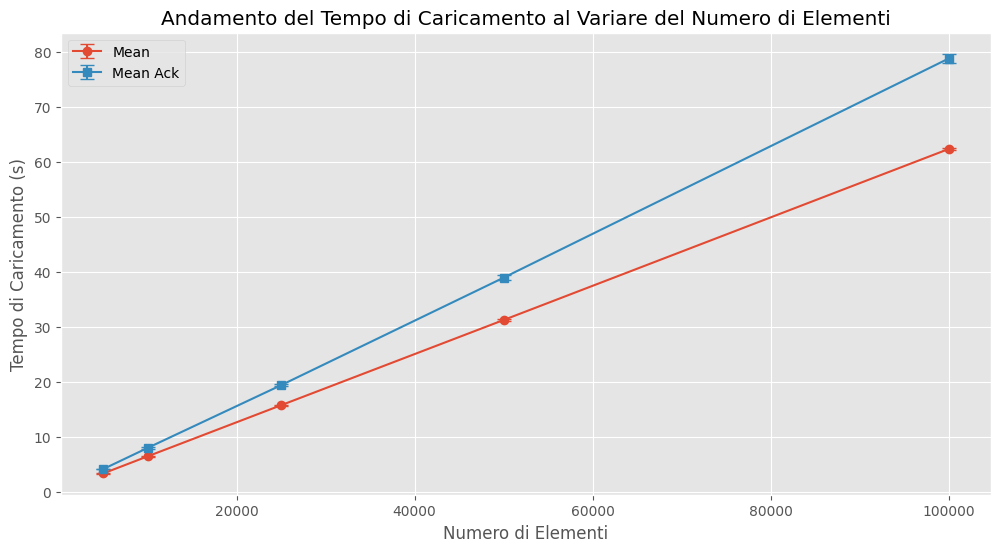

In [8]:
plt.figure(figsize=(12, 6))
# Grafico per mean con deviazione standard
plt.errorbar(total_df['qty'], total_df['mean'], yerr=total_df['std'], fmt='-o', label='Mean', capsize=5)

# Grafico per mean_ack con deviazione standard
plt.errorbar(total_df['qty'], total_df['mean_ack'], yerr=total_df['std_ack'], fmt='-s', label='Mean Ack', capsize=5)

plt.title("Andamento del Tempo di Caricamento al Variare del Numero di Elementi")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

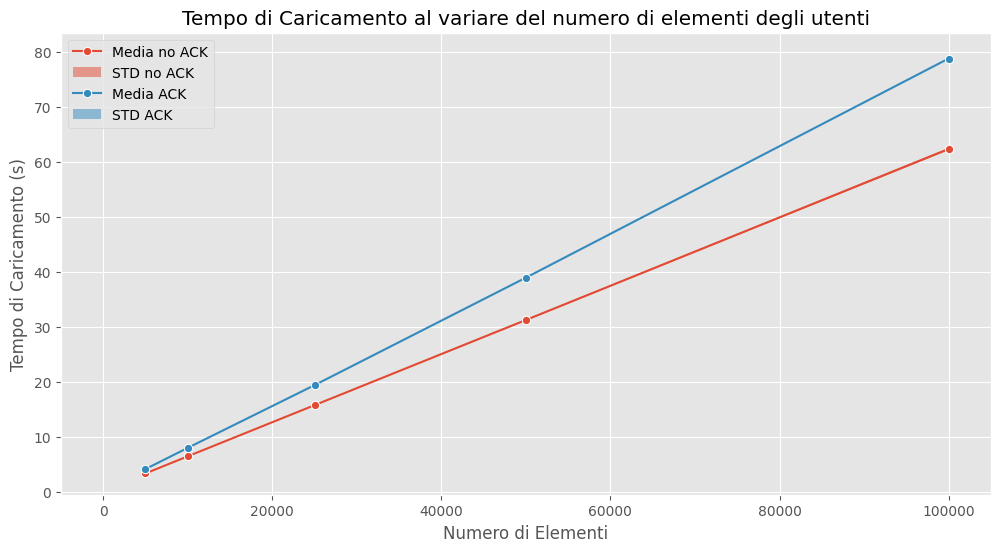

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=total_df, marker="o", label="Media no ACK")
plt.fill_between(
    total_df["qty"],
    total_df["mean"] - total_df["std"],
    total_df["mean"] + total_df["std"],
    alpha=0.5,
    label="STD no ACK",
)

sns.lineplot(x="qty", y="mean_ack", data=total_df, marker="o", label="Media ACK")
plt.fill_between(
    total_df["mean_ack"],
    total_df["mean_ack"] - total_df["std_ack"],
    total_df["mean_ack"] + total_df["std_ack"],
    alpha=0.5,
    label="STD ACK",
)

# Personalizza il grafico
plt.title("Tempo di Caricamento al variare del numero di elementi degli utenti")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

### Distributed

In [10]:
summary_nodes_dist = (
    nodes_loading_dist.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)
summary_nodes_dist.head()

,qty,mean,std
0,5000,3.882400,0.077063
1,10000,7.836952,0.101610
2,25000,19.495651,0.336585
3,50000,38.565267,0.567491
4,100000,77.640255,0.677757


In [11]:
summary_nodes_dist_ack = (
    nodes_loading_dist_ack.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)

total_df = pd.concat([summary_nodes_cent, summary_nodes_cent_ack], axis=1)
total_df.columns = ["qty", "mean", "std", "qty_ack", "mean_ack", "std_ack"]
total_df.drop("qty_ack", axis=1, inplace=True)
total_df

,qty,mean,std,mean_ack,std_ack
0,5000,3.289061,0.046995,4.083256,0.055018
1,10000,6.405218,0.047076,7.939268,0.127238
2,25000,15.704704,0.080557,19.349207,0.232263
3,50000,31.199313,0.123353,38.897267,0.426280
4,100000,62.293718,0.222520,78.748530,0.874560


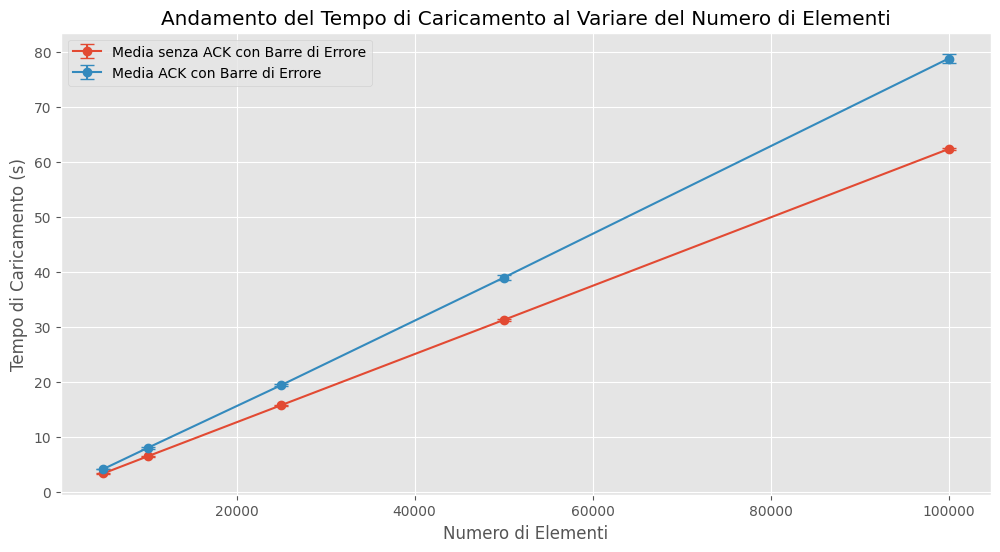

In [12]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    total_df["qty"],
    total_df["mean"],
    yerr=total_df["std"],
    fmt="-o",
    capsize=5,
    label="Media senza ACK con Barre di Errore",
)

plt.errorbar(
    total_df["qty"],
    total_df["mean_ack"],
    yerr=total_df["std_ack"],
    fmt="-o",
    capsize=5,
    label="Media ACK con Barre di Errore",
)
plt.title("Andamento del Tempo di Caricamento al Variare del Numero di Elementi")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

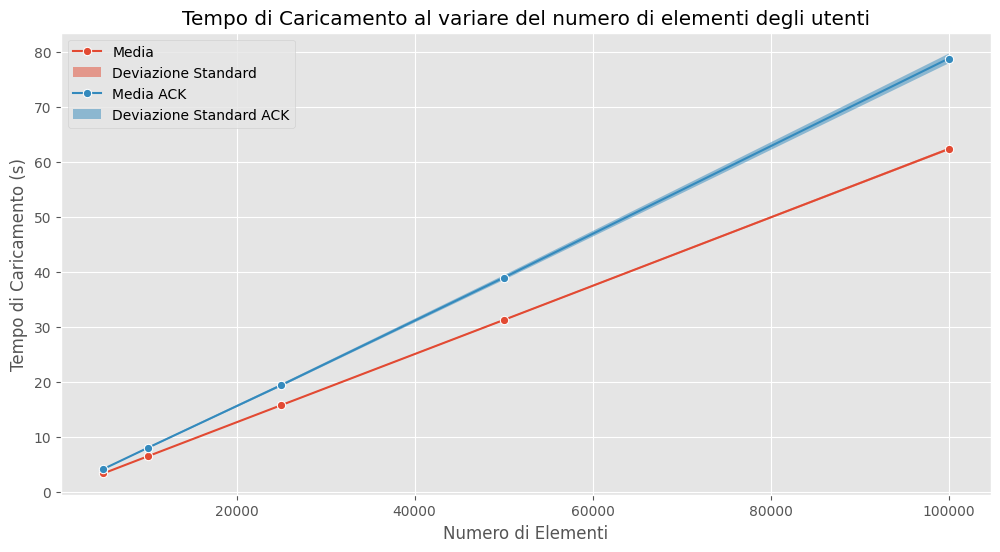

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=total_df, marker="o", label="Media")
plt.fill_between(
    total_df["qty"],
    total_df["mean"] - total_df["std"],
    total_df["mean"] + total_df["std"],
    alpha=0.5,
    label="Deviazione Standard",
)

sns.lineplot(x="qty", y="mean_ack", data=total_df, marker="o", label="Media ACK")
plt.fill_between(
    total_df["qty"],
    total_df["mean_ack"] - total_df["std_ack"],
    total_df["mean_ack"] + total_df["std_ack"],
    alpha=0.5,
    label="Deviazione Standard ACK",
)

# Personalizza il grafico
plt.title("Tempo di Caricamento al variare del numero di elementi degli utenti")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

## Edges

In [14]:
cols = ['ex', 'qty', 'likes', 'matches']

edges_loading_cent.reset_index(inplace=True)
edges_loading_cent.columns = cols

edges_loading_dist.reset_index(inplace=True)
edges_loading_dist.columns = cols

edges_loading_cent_ack.reset_index(inplace=True)
edges_loading_cent_ack.columns = cols

edges_loading_dist_ack.reset_index(inplace=True)
edges_loading_dist_ack.columns = cols

### Centralized

In [15]:
summary_edges_cent = (
    edges_loading_cent.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)
summary_edges_cent.head()

,qty,mean,std
0,10000,1.113222,0.073170
1,50000,5.264595,0.060192
2,100000,10.630881,0.229666
3,250000,26.211831,0.143768
4,500000,52.458667,0.235045


In [16]:
edges_loading_cent_ack = (
    edges_loading_cent_ack.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)

total_df = pd.concat([summary_edges_cent, edges_loading_cent_ack], axis=1)
total_df.columns = ["qty", "mean", "std", "qty_ack", "mean_ack", "std_ack"]
total_df.drop("qty_ack", axis=1, inplace=True)
total_df

,qty,mean,std,mean_ack,std_ack
0,10000,1.113222,0.073170,1.841998,0.355456
1,50000,5.264595,0.060192,7.128386,0.370986
2,100000,10.630881,0.229666,13.815185,0.674103
3,250000,26.211831,0.143768,33.051020,0.449177
4,500000,52.458667,0.235045,65.066346,0.626744
5,1000000,105.310279,0.789682,133.657192,8.953930


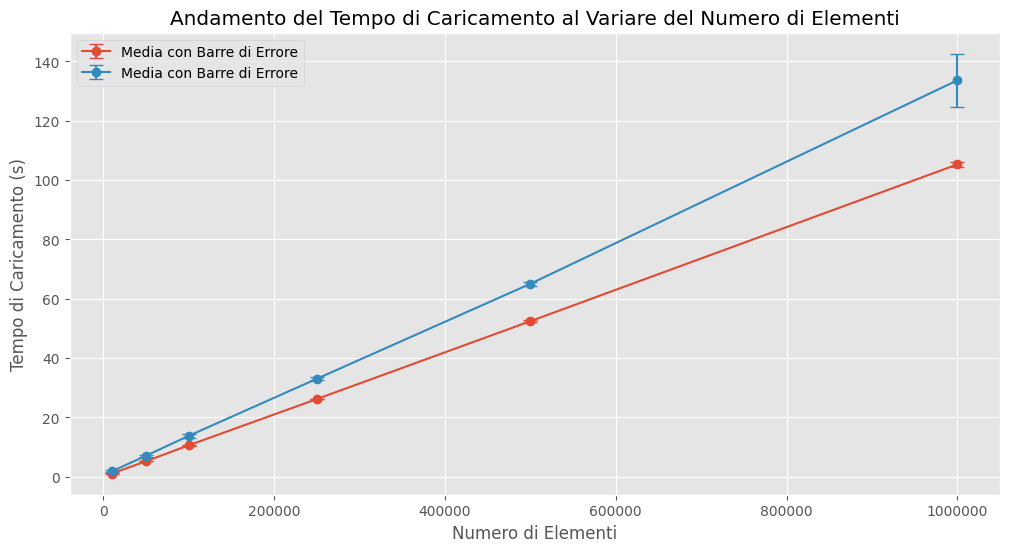

In [17]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    total_df["qty"],
    total_df["mean"],
    yerr=total_df["std"],
    fmt="-o",
    capsize=5,
    label="Media con Barre di Errore",
)

plt.errorbar(
    total_df["qty"],
    total_df["mean_ack"],
    yerr=total_df["std_ack"],
    fmt="-o",
    capsize=5,
    label="Media con Barre di Errore",
)

plt.title("Andamento del Tempo di Caricamento al Variare del Numero di Elementi")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
plt.show()

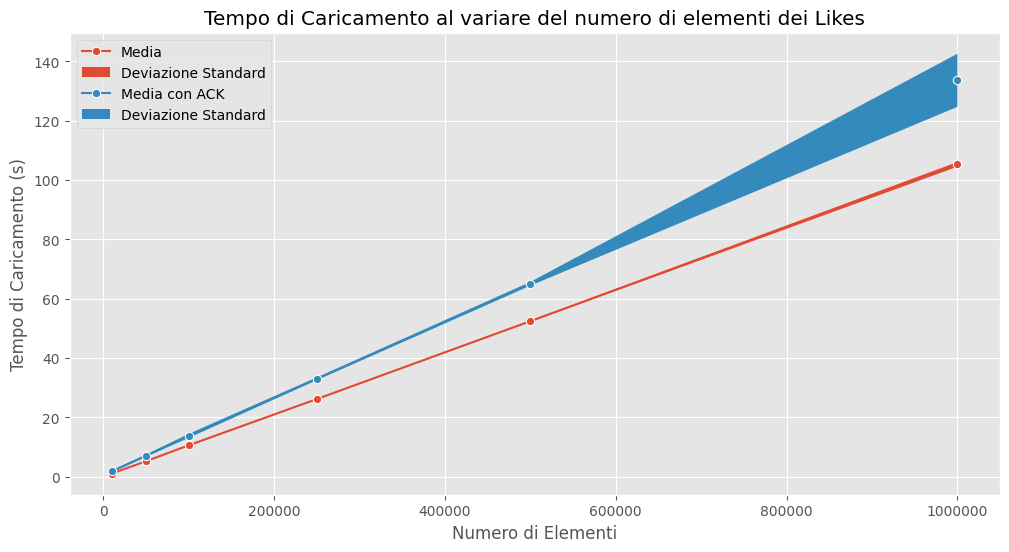

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='qty', y='mean', data=total_df, marker='o', label='Media')
plt.fill_between(total_df['qty'], 
                 total_df['mean'] - total_df['std'], 
                 total_df['mean'] + total_df['std'], 
                 alpha=1, label='Deviazione Standard')

sns.lineplot(x='qty', y='mean_ack', data=total_df, marker='o', label='Media con ACK')
plt.fill_between(total_df['qty'], 
                 total_df['mean_ack'] - total_df['std_ack'], 
                 total_df['mean_ack'] + total_df['std_ack'], 
                 alpha=1, label='Deviazione Standard')

# Personalizza il grafico
plt.title('Tempo di Caricamento al variare del numero di elementi dei Likes')
plt.xlabel('Numero di Elementi')
plt.ylabel('Tempo di Caricamento (s)')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
plt.show()

### Distributed

In [19]:
summary_edges_dist = (
    edges_loading_dist.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)
summary_edges_dist.head()

,qty,mean,std
0,10000,1.390494,0.194628
1,50000,6.740473,0.337397
2,100000,13.467751,1.004086
3,250000,33.637082,0.803774
4,500000,67.853111,3.529804


In [20]:
edges_loading_dist_ack = (
    edges_loading_dist_ack.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)

total_df = pd.concat([summary_edges_dist, edges_loading_dist_ack], axis=1)
total_df.columns = ["qty", "mean", "std", "qty_ack", "mean_ack", "std_ack"]
total_df.drop("qty_ack", axis=1, inplace=True)
total_df

,qty,mean,std,mean_ack,std_ack
0,10000,1.390494,0.194628,4.106851,1.951339
1,50000,6.740473,0.337397,11.723836,2.197212
2,100000,13.467751,1.004086,18.990911,1.262199
3,250000,33.637082,0.803774,40.537676,3.379788
4,500000,67.853111,3.529804,78.776783,4.512625
5,1000000,140.370458,16.620812,173.650344,63.076383


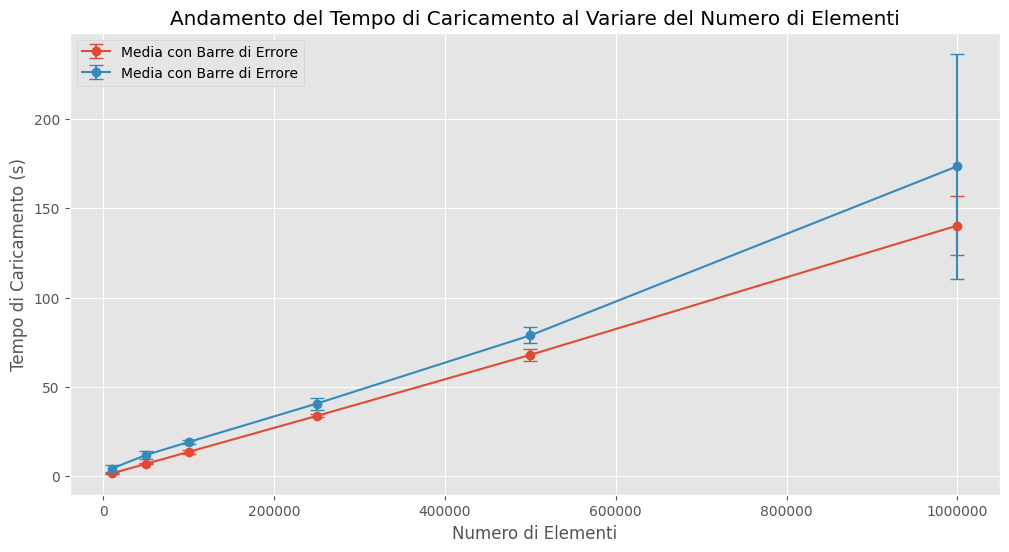

In [21]:
plt.figure(figsize=(12, 6))
plt.errorbar(
    total_df["qty"],
    total_df["mean"],
    yerr=total_df["std"],
    fmt="-o",
    capsize=5,
    label="Media con Barre di Errore",
)

plt.errorbar(
    total_df["qty"],
    total_df["mean_ack"],
    yerr=total_df["std_ack"],
    fmt="-o",
    capsize=5,
    label="Media con Barre di Errore",
)
plt.title("Andamento del Tempo di Caricamento al Variare del Numero di Elementi")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)
plt.show()

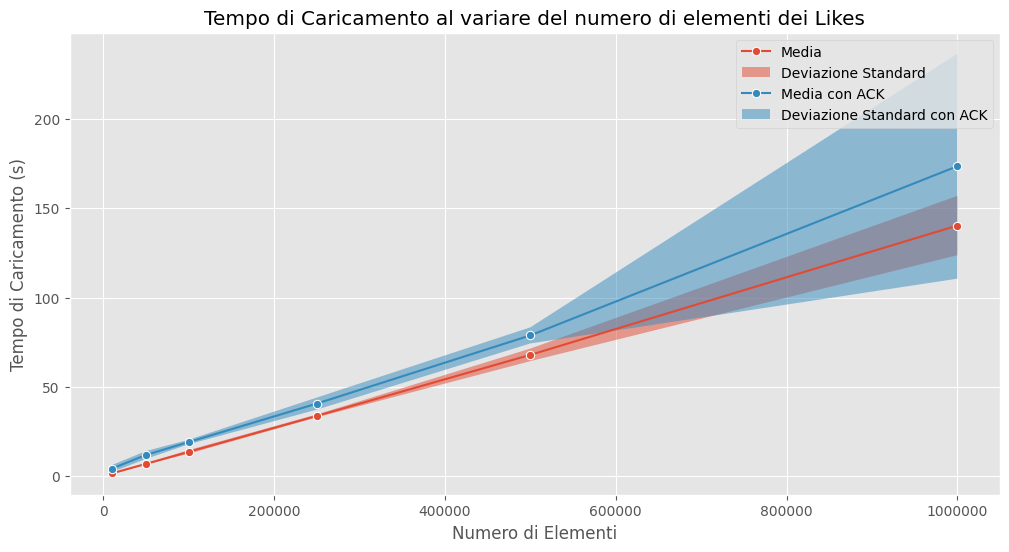

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='qty', y='mean', data=total_df, marker='o', label='Media')
plt.fill_between(total_df['qty'], 
                 total_df['mean'] - total_df['std'], 
                 total_df['mean'] + total_df['std'], 
                 alpha=0.5, label='Deviazione Standard')

sns.lineplot(x='qty', y='mean_ack', data=total_df, marker='o', label='Media con ACK')
plt.fill_between(total_df['qty'], 
                 total_df['mean_ack'] - total_df['std_ack'], 
                 total_df['mean_ack'] + total_df['std_ack'], 
                 alpha=0.5, label='Deviazione Standard con ACK')

# Personalizza il grafico
plt.title('Tempo di Caricamento al variare del numero di elementi dei Likes')
plt.xlabel('Numero di Elementi')
plt.ylabel('Tempo di Caricamento (s)')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()

## Confronto tra Centralized e Distributed

In [23]:
compare_nodes = pd.concat([summary_nodes_cent, summary_nodes_dist], axis=1)
compare_nodes.columns = ["qty", "mean", "std", "qty_dist", "mean_dist", "std_dist"]
compare_nodes.drop("qty_dist", axis=1, inplace=True)
compare_nodes

,qty,mean,std,mean_dist,std_dist
0,5000,3.289061,0.046995,3.882400,0.077063
1,10000,6.405218,0.047076,7.836952,0.101610
2,25000,15.704704,0.080557,19.495651,0.336585
3,50000,31.199313,0.123353,38.565267,0.567491
4,100000,62.293718,0.222520,77.640255,0.677757


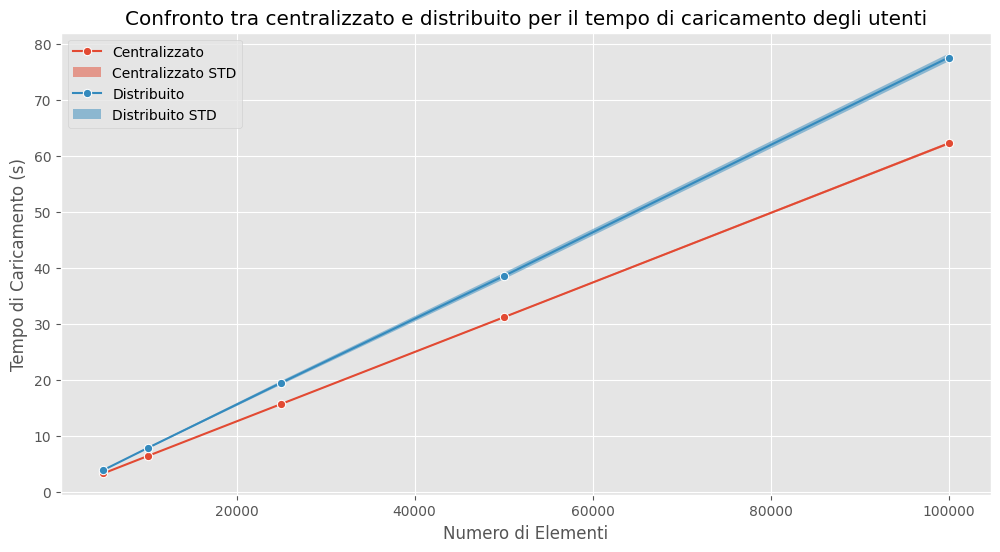

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=compare_nodes, marker="o", label="Centralizzato")
plt.fill_between(
    compare_nodes["qty"],
    compare_nodes["mean"] - compare_nodes["std"],
    compare_nodes["mean"] + compare_nodes["std"],
    alpha=0.5,
    label="Centralizzato STD",
)

sns.lineplot(
    x="qty", y="mean_dist", data=compare_nodes, marker="o", label="Distribuito"
)
plt.fill_between(
    compare_nodes["qty"],
    compare_nodes["mean_dist"] - compare_nodes["std_dist"],
    compare_nodes["mean_dist"] + compare_nodes["std_dist"],
    alpha=0.5,
    label="Distribuito STD",
)

# Personalizza il grafico
plt.title(
    "Confronto tra centralizzato e distribuito per il tempo di caricamento degli utenti"
)
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()

In [25]:
compare_edges = pd.concat([summary_edges_cent, summary_edges_dist], axis=1)
compare_edges.columns = ["qty", "mean", "std", "qty_dist", "mean_dist", "std_dist"]
compare_edges.drop("qty_dist", axis=1, inplace=True)
compare_edges

,qty,mean,std,mean_dist,std_dist
0,10000,1.113222,0.073170,1.390494,0.194628
1,50000,5.264595,0.060192,6.740473,0.337397
2,100000,10.630881,0.229666,13.467751,1.004086
3,250000,26.211831,0.143768,33.637082,0.803774
4,500000,52.458667,0.235045,67.853111,3.529804
5,1000000,105.310279,0.789682,140.370458,16.620812


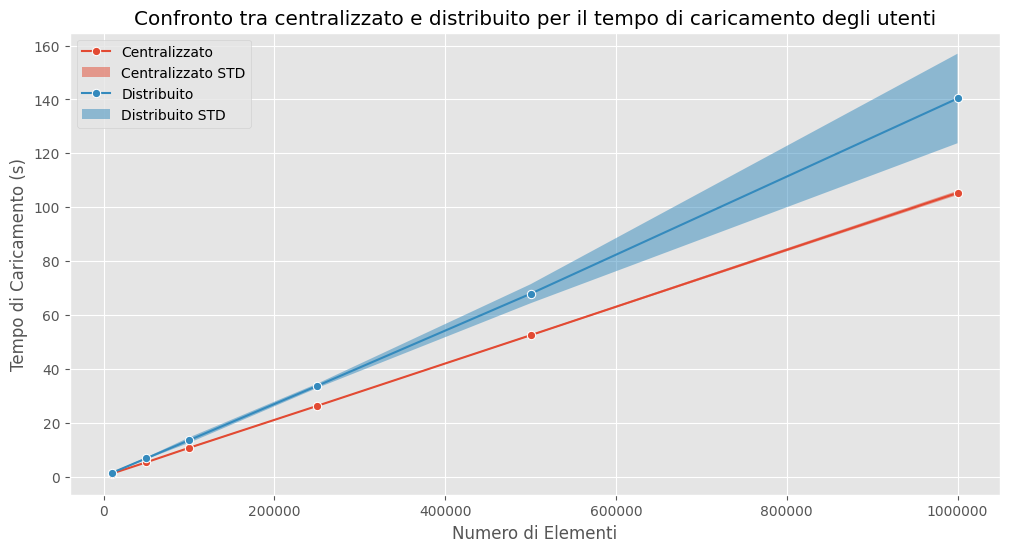

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=compare_edges, marker="o", label="Centralizzato")
plt.fill_between(
    compare_edges["qty"],
    compare_edges["mean"] - compare_edges["std"],
    compare_edges["mean"] + compare_edges["std"],
    alpha=0.5,
    label="Centralizzato STD",
)

sns.lineplot(
    x="qty", y="mean_dist", data=compare_edges, marker="o", label="Distribuito"
)
plt.fill_between(
    compare_edges["qty"],
    compare_edges["mean_dist"] - compare_edges["std_dist"],
    compare_edges["mean_dist"] + compare_edges["std_dist"],
    alpha=0.5,
    label="Distribuito STD",
)

# Personalizza il grafico
plt.title(
    "Confronto tra centralizzato e distribuito per il tempo di caricamento degli utenti"
)
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax.xaxis.get_major_formatter().set_scientific(False)

plt.show()

## Write Concern confronti

In [27]:
wc1_node_df = pd.read_csv("./../results/loading_nodes_dist_new_wc1.csv", index_col=[0, 1])
wc1_edges_df = pd.read_csv("./../results/loading_edges_dist_new_wc1.csv", index_col=[0, 1])
wc1_node_df.head()

city     color   country  located_in     movie  movie_category  \
0 5000    0.251103  0.048214  0.044972    0.252158  0.102247        0.055756   
  10000   0.292491  0.052074  0.058712    0.320843  0.135271        0.060696   
  25000   0.350162  0.048290  0.052996    0.345389  0.113536        0.048919   
  50000   0.300460  0.062744  0.044578    0.349949  0.129228        0.075078   
  100000  0.337067  0.053812  0.062904    0.356192  0.102398        0.059075   

               user  university  
0 5000     3.513564    0.152046  
  10000    7.221346    0.175190  
  25000   18.603441    0.241686  
  50000   38.276212    0.263498  
  100000  75.922809    0.248646

In [28]:
cols = [
    "ex",
    "qty",
    "city",
    "color",
    "country",
    "located_in",
    "movie",
    "movie_category",
    "user",
    "university",
]

wc1_node_df.reset_index(inplace=True)
wc1_node_df.columns = cols

cols = ['ex', 'qty', 'likes', 'matches']

wc1_edges_df.reset_index(inplace=True)
wc1_edges_df.columns = cols

In [29]:
summary_wc1_node_df = (
    wc1_node_df.groupby("qty")["user"].agg(["mean", "std"]).reset_index()
)

summary_wc1_edges_df = (
    wc1_edges_df.groupby("qty")["likes"].agg(["mean", "std"]).reset_index()
)

In [30]:
summary_wc1_node_df

,qty,mean,std
0,5000,3.811072,0.145737
1,10000,7.567111,0.203665
2,25000,19.000601,0.373613
3,50000,37.883905,0.612483
4,100000,76.522873,1.203864


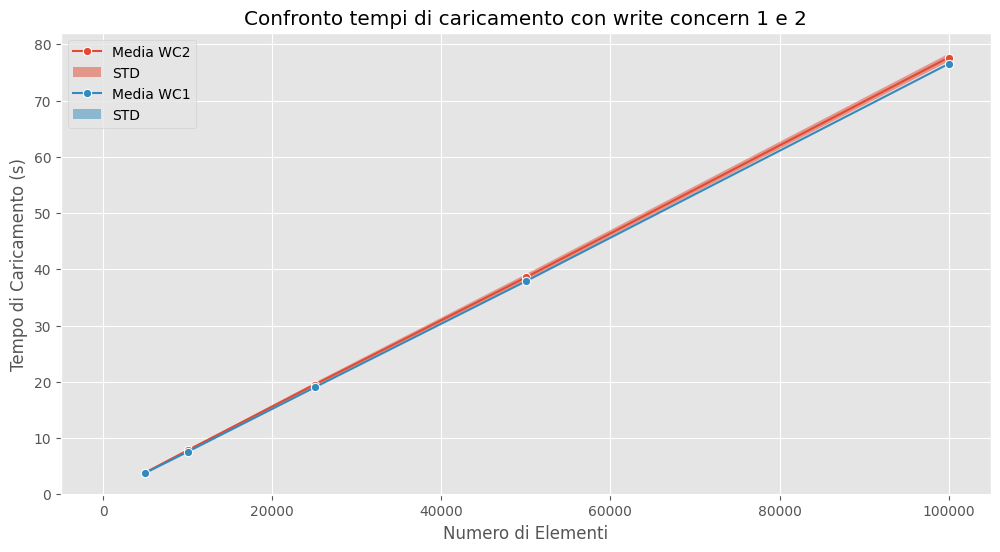

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=summary_nodes_dist, marker="o", label="Media WC2")
plt.fill_between(
    summary_nodes_dist["qty"],
    summary_nodes_dist["mean"] - summary_nodes_dist["std"],
    summary_nodes_dist["mean"] + summary_nodes_dist["std"],
    alpha=0.5,
    label="STD",
)

sns.lineplot(x="qty", y="mean", data=summary_wc1_node_df, marker="o", label="Media WC1")
plt.fill_between(
    summary_wc1_node_df["mean"],
    summary_wc1_node_df["mean"] - summary_wc1_node_df["std"],
    summary_wc1_node_df["mean"] + summary_wc1_node_df["std"],
    alpha=0.5,
    label="STD",
)

# Personalizza il grafico
plt.title("Confronto tempi di caricamento con write concern 1 e 2")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

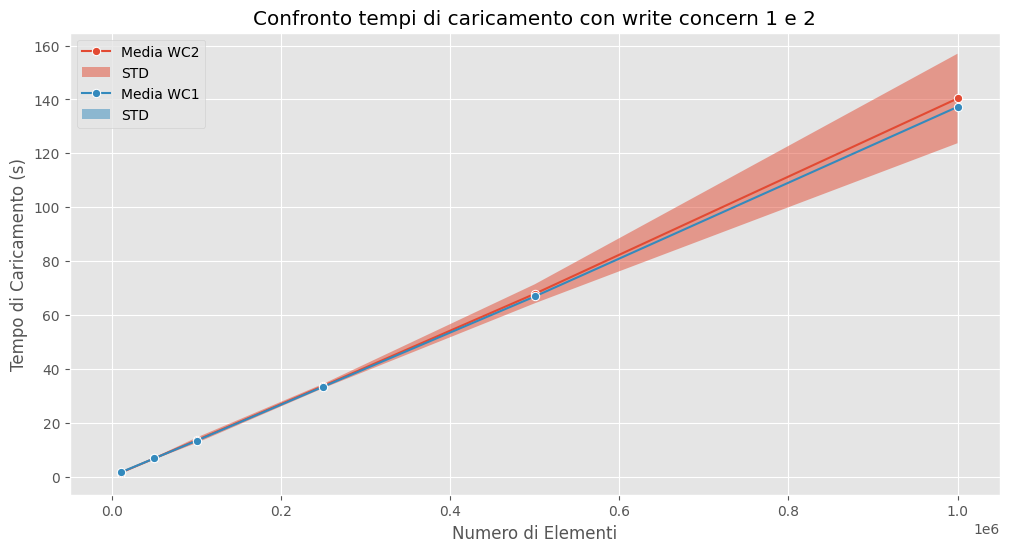

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="qty", y="mean", data=summary_edges_dist, marker="o", label="Media WC2")
plt.fill_between(
    summary_edges_dist["qty"],
    summary_edges_dist["mean"] - summary_edges_dist["std"],
    summary_edges_dist["mean"] + summary_edges_dist["std"],
    alpha=0.5,
    label="STD",
)

sns.lineplot(x="qty", y="mean", data=summary_wc1_edges_df, marker="o", label="Media WC1")
plt.fill_between(
    summary_wc1_edges_df["mean"],
    summary_wc1_edges_df["mean"] - summary_wc1_edges_df["std"],
    summary_wc1_edges_df["mean"] + summary_wc1_edges_df["std"],
    alpha=0.5,
    label="STD",
)

# Personalizza il grafico
plt.title("Confronto tempi di caricamento con write concern 1 e 2")
plt.xlabel("Numero di Elementi")
plt.ylabel("Tempo di Caricamento (s)")
plt.legend()
plt.show()

# **Guasti**

In [33]:
query_nodes_1 = pd.read_csv("./../results/queries_results_node_1.csv")
query_nodes_2 = pd.read_csv("./../results/queries_results_node_2.csv")
query_nodes_3 = pd.read_csv("./../results/queries_results_node_3.csv")
query_nodes_4 = pd.read_csv("./../results/queries_results_node_4.csv")

query_nodes = pd.DataFrame()
query_nodes["1 Node"] = query_nodes_1["Query_8"]
query_nodes["2 Nodes"] = query_nodes_2["Query_8"]
query_nodes["3 Nodes"] = query_nodes_3["Query_8"]
query_nodes["4 Nodes"] = query_nodes_4["Query_8"]

query_nodes.head()

,1 Node,2 Nodes,3 Nodes,4 Nodes
0,0.082023,1.155985,1.200521,1.604948
1,0.057556,1.272722,1.210492,1.761218
2,0.062296,0.933625,1.034902,1.247287
3,0.083900,1.114152,0.955184,2.161609
4,0.047845,0.939945,0.954082,1.146846


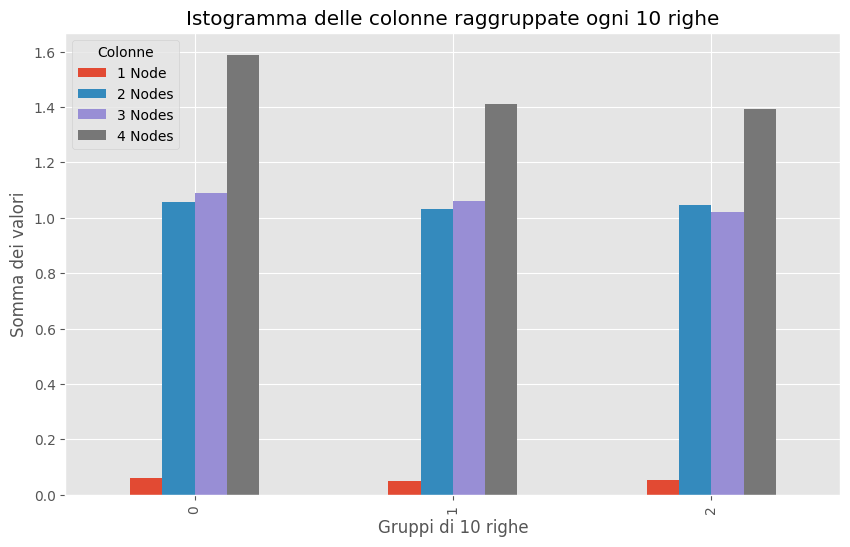

In [34]:
# query_nodes.plot(kind="bar", figsize=(12, 6))

grouped_df = query_nodes.groupby(query_nodes.index // 10).mean()

# Creare un istogramma
grouped_df.plot(kind='bar', figsize=(10, 6))

plt.title('Istogramma delle colonne raggruppate ogni 10 righe')
plt.xlabel('Gruppi di 10 righe')
plt.ylabel('Somma dei valori')
plt.legend(title='Colonne')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


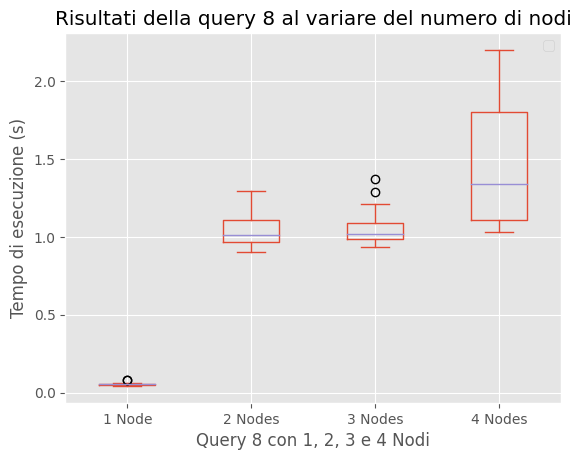

In [35]:
query_nodes.plot(kind='box')
plt.title('Risultati della query 8 al variare del numero di nodi')

plt.xlabel('Query 8 con 1, 2, 3 e 4 Nodi')
plt.ylabel('Tempo di esecuzione (s)')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


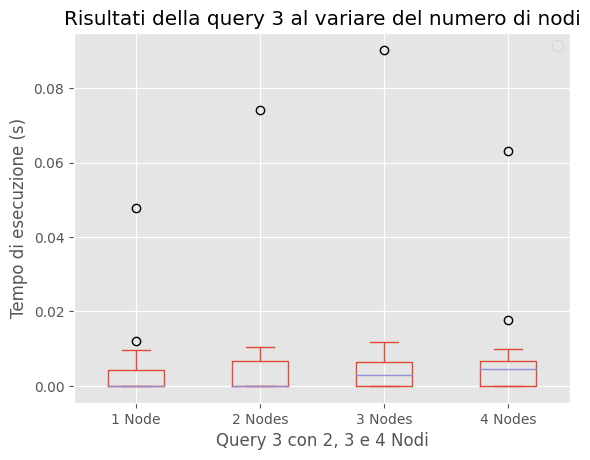

In [43]:
query_nodes = pd.DataFrame()
query_nodes["1 Node"] = query_nodes_1["Query_1"]
query_nodes["2 Nodes"] = query_nodes_2["Query_1"]
query_nodes["3 Nodes"] = query_nodes_3["Query_1"]
query_nodes["4 Nodes"] = query_nodes_4["Query_1"]

query_nodes.plot(kind='box')
plt.title('Risultati della query 3 al variare del numero di nodi')

plt.xlabel('Query 3 con 2, 3 e 4 Nodi')
plt.ylabel('Tempo di esecuzione (s)')
plt.legend()
plt.show()